In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

In [2]:
(X_train,y_train),(X_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 347s 2us/step


In [3]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [4]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [7]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5030 - accuracy: 0.4504 - val_loss: 1.1315 - val_accuracy: 0.6012
Epoch 2/20
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1237 - accuracy: 0.6008 - val_loss: 0.9497 - val_accuracy: 0.6714
Epoch 3/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9655 - accuracy: 0.6624 - val_loss: 0.8820 - val_accuracy: 0.6861
Epoch 4/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8850 - accuracy: 0.6894 - val_loss: 0.8248 - val_accuracy: 0.7121
Epoch 5/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8323 - accuracy: 0.7088 - val_loss: 0.7924 - val_accuracy: 0.7296
Epoch 6/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7849 - accuracy: 0.7231 - val_loss: 0.7374 - val_accuracy: 0.7451
Epoch 7/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7474 - accuracy: 0.7354 - val_loss: 0.6887 -

In [8]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4384

In [9]:
model.save_weights("model_weight.h5")

In [10]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [11]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [12]:
f=Path("model_structure.json")
model_structure=f.read_text()

In [13]:
model=model_from_json(model_structure)

In [14]:
model.load_weights("model_weight.h5")

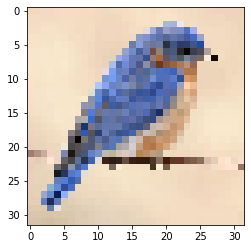

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img("bird.png",target_size=(32,32))
plt.imshow(img)

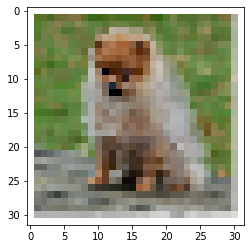

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img("dog.png",target_size=(32,32))
plt.imshow(img)

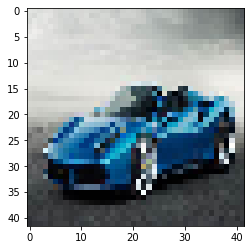

In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img("car.png",target_size=(42,42))
plt.imshow(img)

In [26]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)

list_of_images=np.expand_dims(image_to_test,axis=0)

In [27]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 17ms/step


In [28]:
single_result=results[0]

In [29]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

In [30]:
class_label=class_labels[most_likely_class_index]

In [31]:
print("This is a image is a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a car likelihood: 0.999933
